In [1]:
import pymc3 as pm
import seaborn as sns
import arviz as az

n = 1000

obs_v1 = 680
obs_v2 = 720

In [2]:
with pm.Model() as model:
  # not prior but primed with prior
  # it is a sample from the true effect being modelled
  prior_v1 = pm.Beta('v1_prob', alpha=2, beta=2)
  prior_v2 = pm.Beta('v2_prob', alpha=2, beta=2)

  #likelihood

  like_v1 = pm.Binomial('like_v1', n=n, p=prior_v1, observed=obs_v1)
  like_v2 = pm.Binomial('like_v2', n=n, p=prior_v2, observed=obs_v2)

In [3]:
with model:
  # defining the metrics
  pm.Deterministic('difference', prior_v2 - prior_v1)
  pm.Deterministic('relation', (prior_v2/prior_v1)-1)

In [4]:
with model:
  # inference
  trace = pm.sample(draws=50000, progressbar=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [v2_prob, v1_prob]


Sampling 2 chains for 1_000 tune and 50_000 draw iterations (2_000 + 100_000 draws total) took 72 seconds.


In [5]:
### caterpillar

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


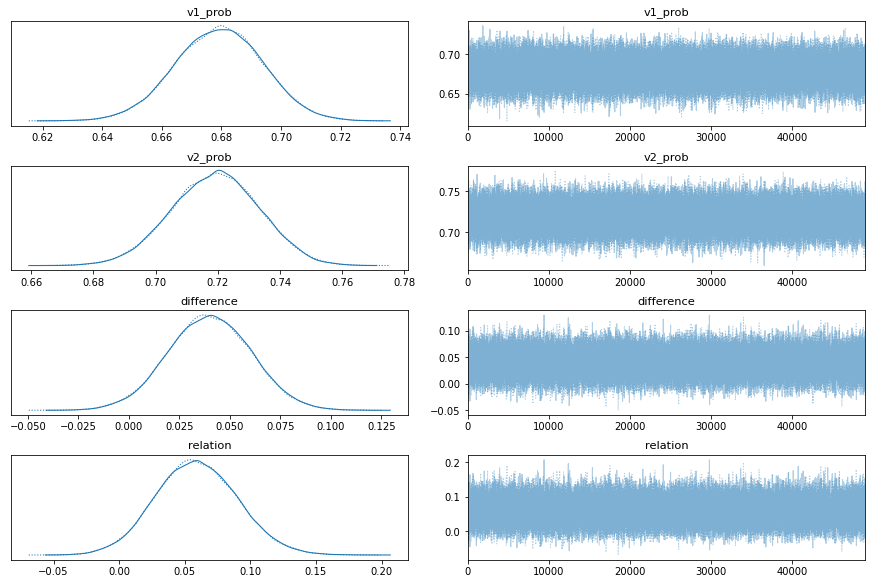

In [6]:
_ = az.plot_trace(trace[1000:])

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcafa2f3fd0>,
      dtype=object)

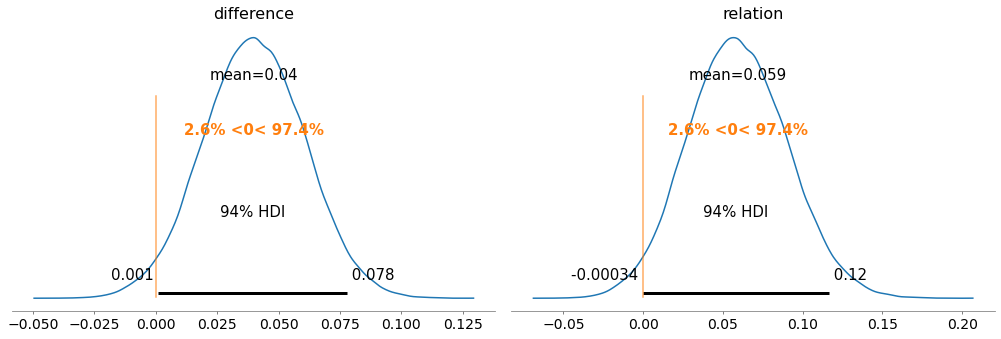

In [7]:
pm.plot_posterior(trace[1000:], var_names=['difference', 'relation'], ref_val=0)

**RESULT: ** We can say with 97% confidence that variation2 is better than variation1